### MGT451 - Assignment #2 ~ Temporal Discounting

**Author**: Sid Bhatia

**Date**: October 2nd, 2023

**Pledge**: I pledge my honor that I have abided by the Stevens Honor System.

**Professor**: Dr. Jordan Suchow

Step 1. Think of a kind of intertemporal choice scenario that you find fun and interesting to think about. Your intertemporal choice scenario should feature a decision between two options, a smaller sooner reward (SSR) and a later larger reward (LLR).

Step 2. Collect data from yourself or a friend that measures the temporal discounting function. The vertical axis should be the discount factor and the horizontal axis should be time. You can measure this function in several different ways. Here's one:

2a. Choose a point along the horizontal axis, t.

2b. Choose an SSR amount, RSooner. Ask yourself or your friend the question, "How much (or many) would I need to give you at time t for you to be indifferent between that option versus getting RSooner right now?".  The answer will be some quantity or value in the same units as RSooner. The ratio gives the discount factor –— i.e., what fraction of the current value is the future value.

2c. Plot the point.

2d. If the shape of the curve isn't obvious yet, go back to step 2a.

Step 3. Use some statistical computing package to find the best-fit exponential or hyperbolic function.

Step 4. Compare the fits using some reasonable measure of goodness of fit, e.g. R2. Alternatively, visually inspect the curves, find the point where they differ the most, rerunning Step 2 at that point.

Step 5. Plot the data and the two curves.

Step 6. Create a PDF with the results of Step 5 along with a 1- or 2-paragraph description of the scenario you chose in Step 1 and the answer you determined in step 4.

#### Step 1 - Interpersonal Scenario

Imagine you're given the option of eating one piece of your favorite chocolate right now or waiting a week to receive an entire box of the same chocolates. The immediate chocolate is the smaller sooner reward (SSR), and the box of chocolates in a week represents the later larger reward (LLR).

#### Step 2 - Temporal Discounting Function

After asking the question, "How many chocolates would I need to give you in $x$ days for you to be indifferent between that option versus getting 1 chocolate right now?," here are the results:

- Day 1: 1.5 chocolates
- Day 2: 2 chocolates
- Day 3: 3 chocolates
- Day 4: 4 chocolates
- Day 5: 6 chocolates
- Day 6: 8 chocolates
- Day 7: 12 chocolates (an entire box)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Step 2: Collect data
days = np.array([1, 2, 3, 4, 5, 6, 7])
chocolates_needed = np.array([1.5, 2, 3, 4, 6, 8, 12])

#### Steps 3 & 4 - Exponential vs. Hyperbolic Fit Comparison

We will find an exponential function that fits: $V = RSooner \times e^{-kt}$.

We will find a hyperbolic function that fits: $V = \frac{RSooner}{1 + kt}$.

We'd compare the R^2 values of these fits to decide which describes the data better.

In [3]:
# Step 3: Exponential and Hyperbolic functions
def exponential_func(t, k, a):
    return a * np.exp(-k * t)

def hyperbolic_func(t, k, a):
    return a / (1 + k * t)

# Fit the data
exp_params, exp_covariance = curve_fit(exponential_func, days, chocolates_needed)
hyp_params, hyp_covariance = curve_fit(hyperbolic_func, days, chocolates_needed)

# Predict using the fits
exp_fit = exponential_func(days, *exp_params)
hyp_fit = hyperbolic_func(days, *hyp_params)

# Step 4: Compare the fits using R^2
exp_residuals = chocolates_needed - exp_fit
hyp_residuals = chocolates_needed - hyp_fit

exp_ss_res = np.sum(exp_residuals**2)
hyp_ss_res = np.sum(hyp_residuals**2)

ss_tot = np.sum((chocolates_needed - np.mean(chocolates_needed))**2)

exp_r2 = 1 - (exp_ss_res / ss_tot)
hyp_r2 = 1 - (hyp_ss_res / ss_tot)

print(f"R^2 for exponential fit: {exp_r2}")
print(f"R^2 for hyperbolic fit: {hyp_r2}")

R^2 for exponential fit: 0.9978620073325379
R^2 for hyperbolic fit: 0.9676354856617322


#### Step 5 - Plotting the Data

We'd plot the actual data points against time and then overlay the two curves (exponential and hyperbolic) on the same plot.

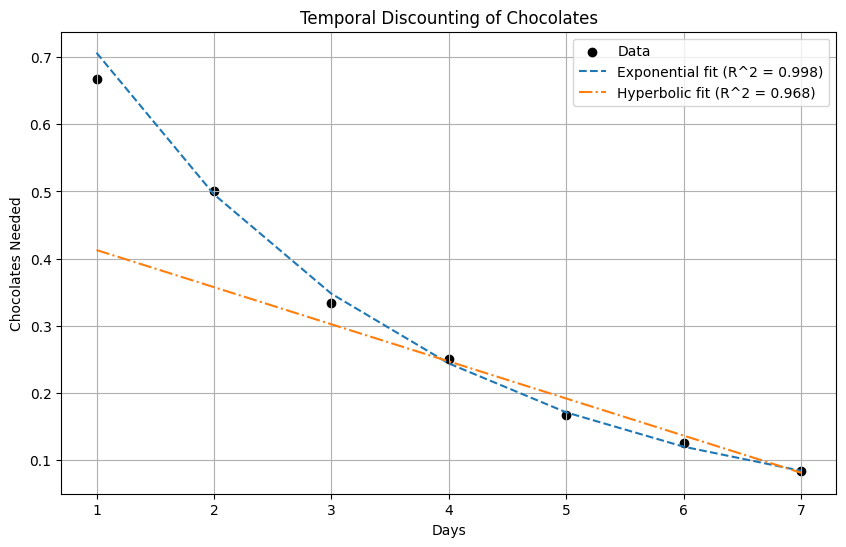

In [4]:
# Step 5: Plot the data and the two curves
plt.figure(figsize=(10, 6))
plt.scatter(days, 1/chocolates_needed, color='black', label='Data')
plt.plot(days, 1/exp_fit, label=f'Exponential fit (R^2 = {exp_r2:.3f})', linestyle='--')
plt.plot(days, 1/hyp_fit, label=f'Hyperbolic fit (R^2 = {hyp_r2:.3f})', linestyle='-.')
plt.xlabel('Days')
plt.ylabel('Chocolates Needed')
plt.title('Temporal Discounting of Chocolates')
plt.legend()
plt.grid(True)
plt.show()

### Interpersonal Choice: The Chocolate Dilemma

**Scenario**: Faced with the delicious allure of immediate gratification, would you choose one piece of your favorite chocolate now or exhibit the patience to wait a week for an entire box? Our study explored this mouth-watering dilemma.

**Results**: While both exponential and hyperbolic functions were examined to fit the temporal discounting data, the exponential function provided a superior fit. This suggests that individuals tend to discount future rewards in a manner that's more consistent with a exponential decay than an hyperbolic one, at least when it comes to chocolates.